In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [4]:
# Set the ticks and label of figure

params = {'figure.autolayout': True,
         'legend.fontsize': 20,
          
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'axes.linewidth': 1.5,
          
         'axes.spines.left': True,
         'axes.spines.bottom': True,
          
         'xtick.labelsize': 20,
         'ytick.labelsize': 20, 
         'xtick.major.size': 3.5,
         'ytick.major.size': 3.5,
         'xtick.major.width': 1.2,
         'ytick.major.width': 1.2}
pylab.rcParams.update(params)

In [3]:
folder = '/Volumes/GoogleDrive-106311891740711524512/My Drive/Lab/Lab_projects/Daron/tetrode\
/20220324_dCA1'
fn = '220426_d2_9_11_5_SWP.ns5'

In [4]:
# Set the directory
datafile = folder+'/'+fn

In [5]:
##############################################################################
# The spikeinterface module by itself import only the spikeinterface.core submodule
# which is not useful for end user

# import spikeinterface

##############################################################################
# Different submodules.
#
# - :code:`extractors` : file IO
# - :code:`preprocessing` : preprocessing 
# - :code:`sorters` : Python wrappers of spike sorters
# - :code:`postprocessing` : postprocessing
# - :code:`qualitymetrics` : quality metrics on units found by sorter 
# - :code:`comparison` : comparison of spike sorting output
# - :code:`widgets` : visualization

import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

In [6]:
datafile

'/Volumes/GoogleDrive-106311891740711524512/My Drive/Lab/Lab_projects/Daron/tetrode/20220324_dCA1/220426_d2_9_11_5_SWP.ns5'

In [7]:
recording = se.read_blackrock(datafile)

In [16]:
# :code:`recording` is a :py:class:`~spikeinterface.core.BaseRecording` object, which extracts information about
# channel ids,  channel locations (if present), the sampling frequency of the recording, and the extracellular
# traces. :code:`sorting_true` is a :py:class:`~spikeinterface.core.BaseSorting` object, which contains information
# about spike-sorting related information,  including unit ids, spike trains, etc. Since the data are simulated,
# :code:`sorting_true` has ground-truth information of the spiking activity of each unit.
#
# Let's use the :py:mod:`spikeinterface.widgets` module to visualize the traces and the raster plots.

BlackrockRecordingExtractor: 16 channels - 1 segments - 30.0kHz - 1800.010s
  file_path: /Volumes/GoogleDrive-106311891740711524512/My Drive/Lab/Lab_projects/Daron/tetrode/20220324_dCA1/220426_d2_9_11_5_SWP.ns5

In [8]:
print(recording)

BlackrockRecordingExtractor: 16 channels - 1 segments - 30.0kHz - 1800.010s
  file_path: /Volumes/GoogleDrive-106311891740711524512/My Drive/Lab/Lab_projects/Daron/tetrode/20220324_dCA1/220426_d2_9_11_5_SWP.ns5


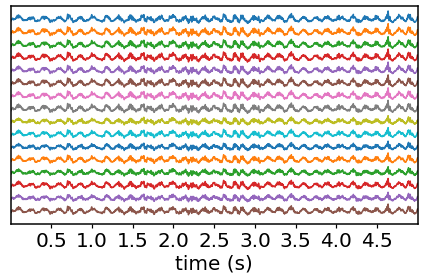

In [9]:
w_ts = sw.plot_timeseries(recording, time_range=(0, 5))

In [10]:
##############################################################################
# This is how you retrieve info from a :py:class:`~spikeinterface.core.BaseRecording`...

channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)

Channel ids: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16']
Sampling frequency: 30000.0
Number of channels: 16
Number of segments: 1


In [14]:
##############################################################################
# ...and a :py:class:`~spikeinterface.core.BaseSorting`

num_seg = recording.get_num_segments()
print('Number of segments:', num_seg)

Number of segments: 1


In [8]:
##############################################################################
#  We can also import all submodules at once with this
#  this internally import core+extractors+preprocessing+sorters+postprocessing+
#  qualitymetrics+comparison+widgets+exporters
#
# This is useful for notebooks but this is a more heavy import because internally many more dependency
# are imported (scipy/sklearn/networkx/matplotlib/h5py...)

import spikeinterface.full as si

In [9]:
recording_cmr = recording
recording_f = si.bandpass_filter(recording, freq_min=150, freq_max=250)
print(recording_f)
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')
print(recording_cmr)

BandpassFilterRecording: 16 channels - 1 segments - 30.0kHz - 1800.010s
CommonReferenceRecording: 16 channels - 1 segments - 30.0kHz - 1800.010s


/Users/daron/opt/anaconda3/lib/python3.8/site-packages/spikeinterface/widgets/basewidget.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()


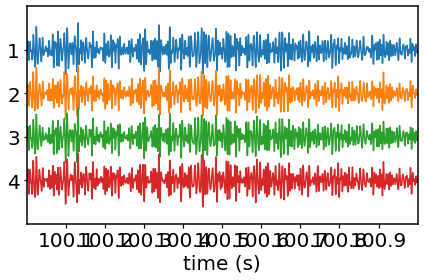

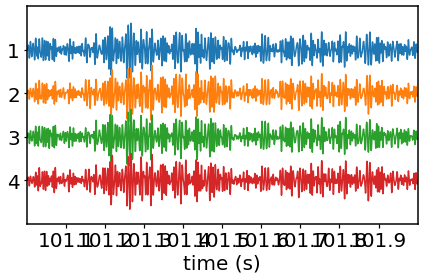

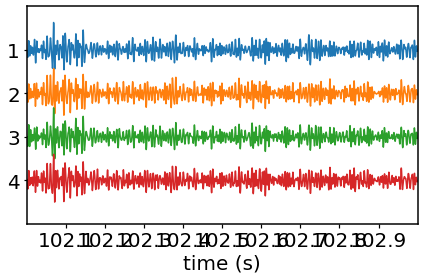

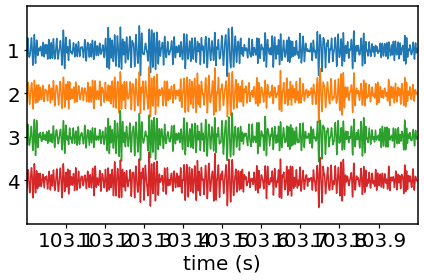

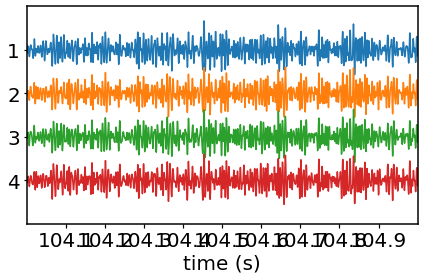

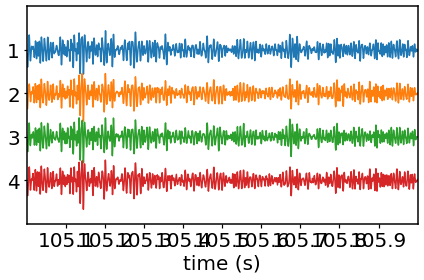

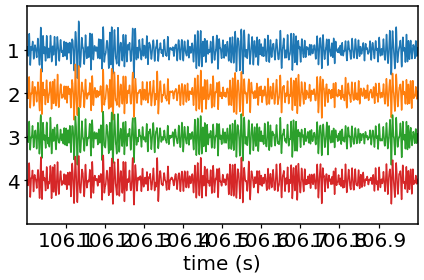

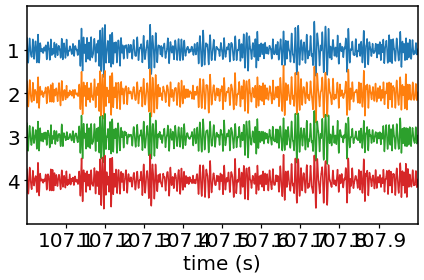

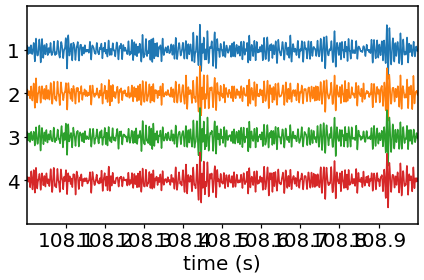

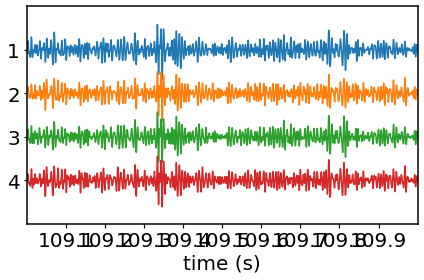

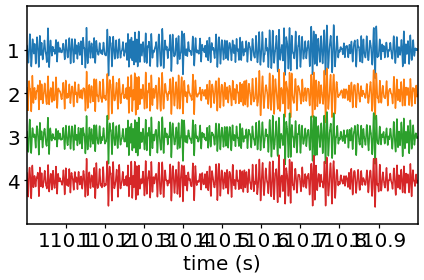

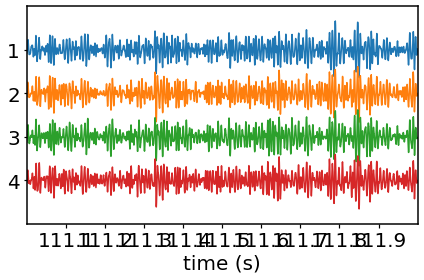

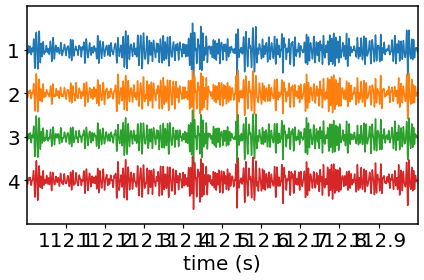

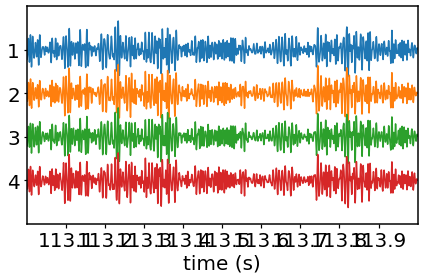

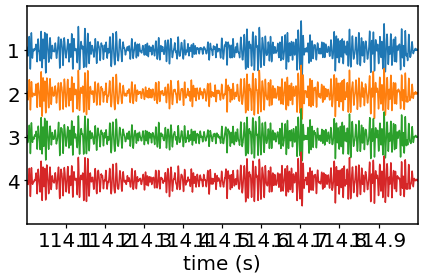

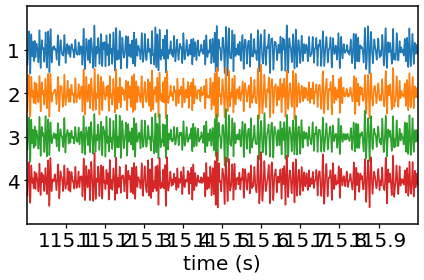

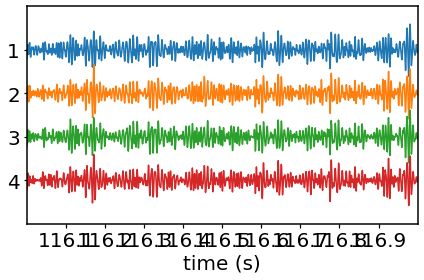

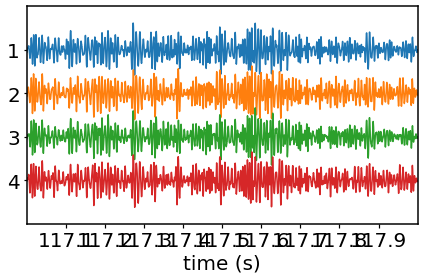

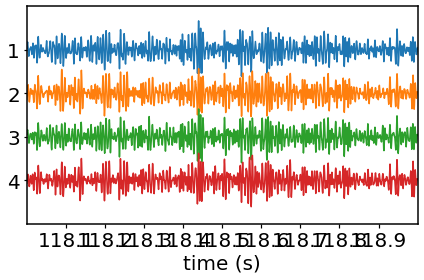

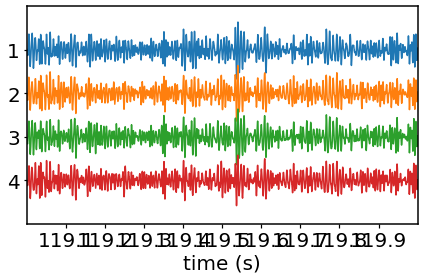

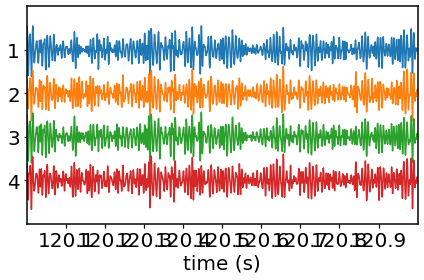

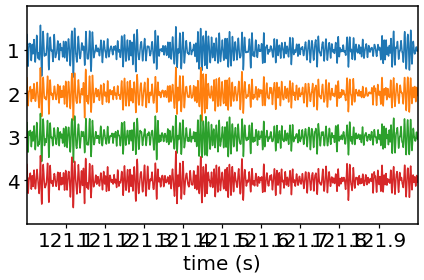

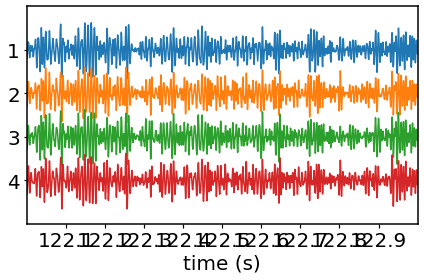

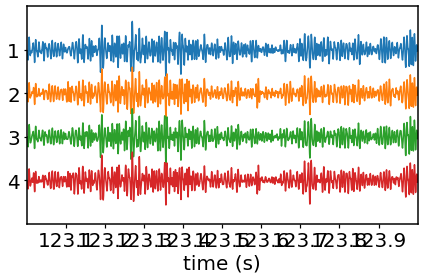

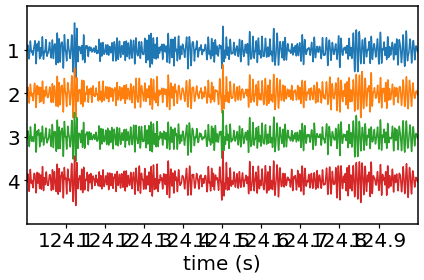

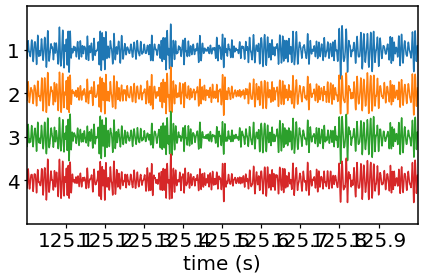

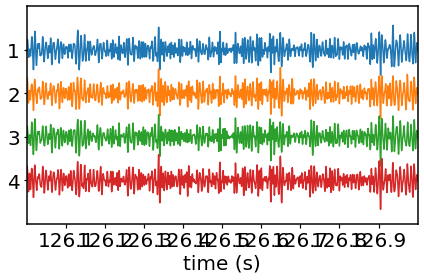

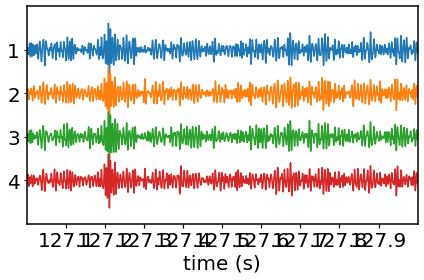

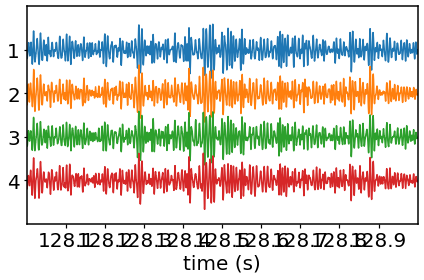

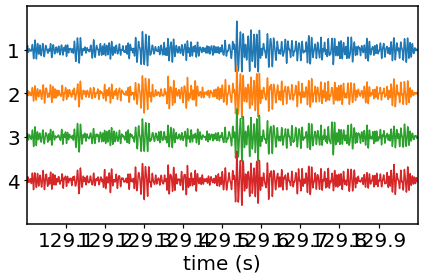

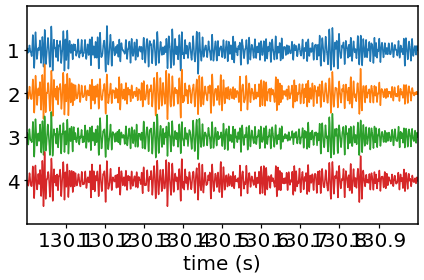

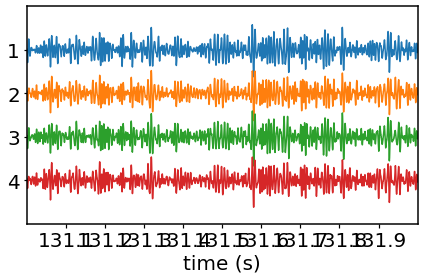

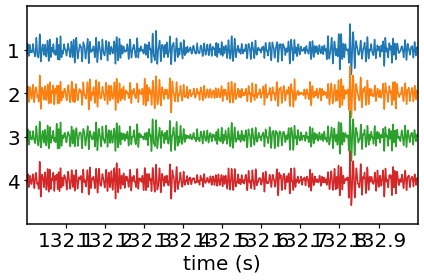

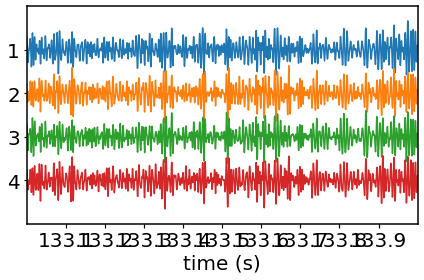

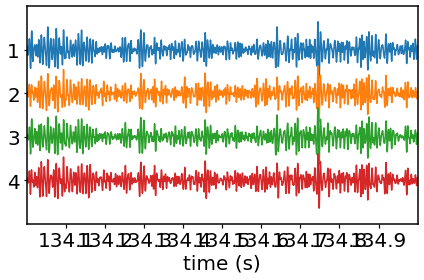

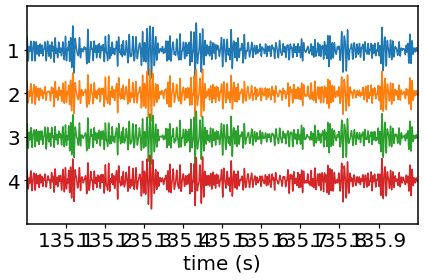

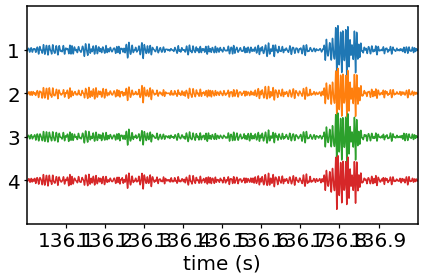

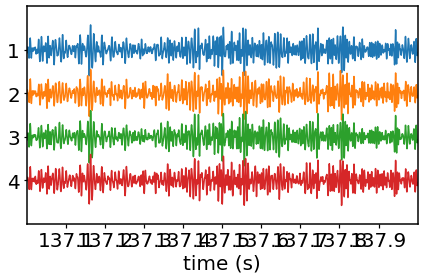

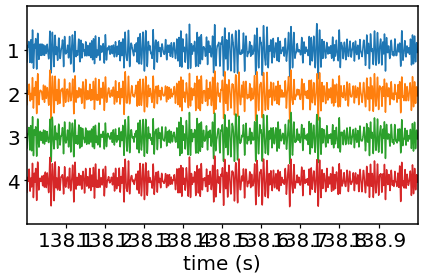

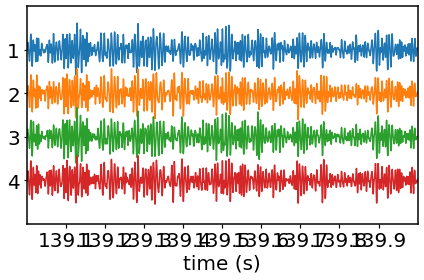

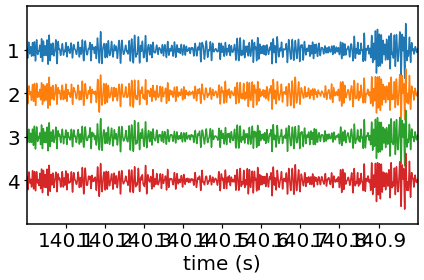

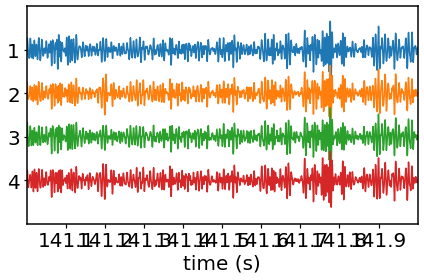

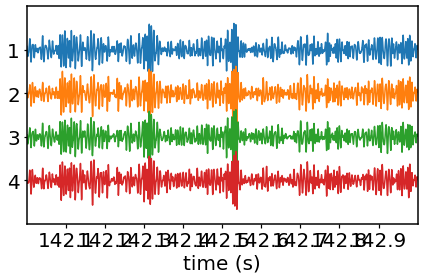

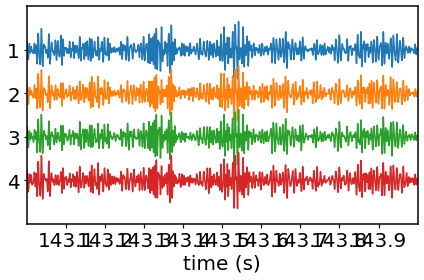

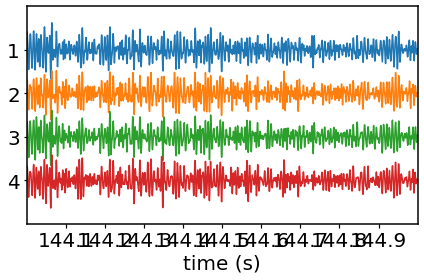

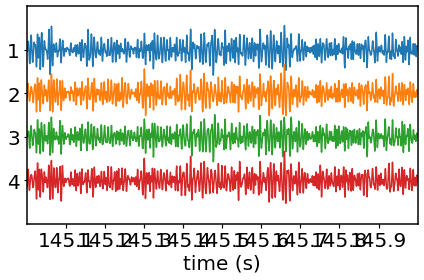

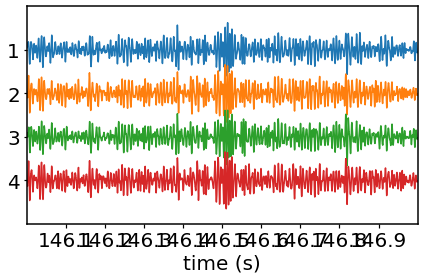

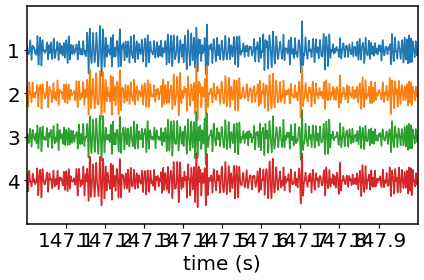

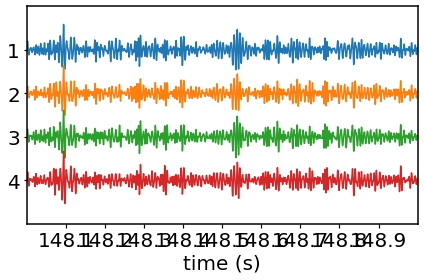

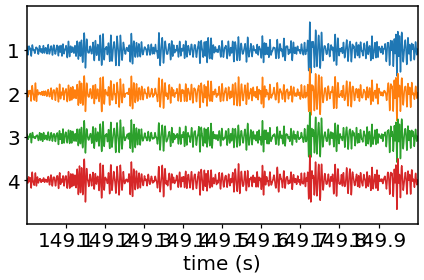

In [68]:
for i in np.arange(100,150):
    sw.plot_timeseries(recording_f, time_range=(i, i+1),
                       color_groups=True, channel_ids=['1','2','3','4'],
                       show_channel_ids=True, mode='line'
                      )

In [103]:
def tunefig(xlim,ylim,xlabel,ylabel,xticklabels,title):
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ax = plt.gca()
    plt.legend()
    axbox = ax.get_position()
    ax.legend(loc = (axbox.x0+.8, axbox.y0+.6))
    
    ax.set_xticks([.5,1.5,2.5,3.5,4.5])
    ax.set_xticklabels(xticklabels)
    
    # Hide the spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Move spines outward by 10 points
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

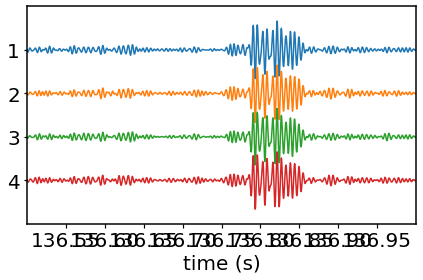

In [108]:
sw.plot_timeseries(recording_f, time_range=(136.5, 137),
                   color_groups=True,
                   channel_ids=['1','2','3','4'],
                   show_channel_ids=True, mode='line'
                  )

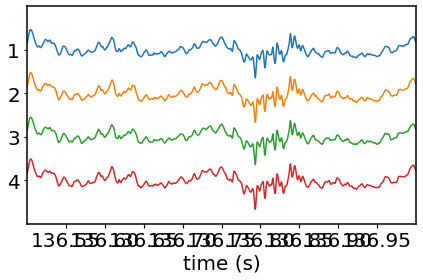

In [78]:
sw.plot_timeseries(recording, time_range=(136.5, 137),
                   color_groups=True,
                   channel_ids=['1','2','3','4'],
                   show_channel_ids=True, mode='line'
                  )

/Users/daron/opt/anaconda3/lib/python3.8/site-packages/spikeinterface/widgets/basewidget.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()


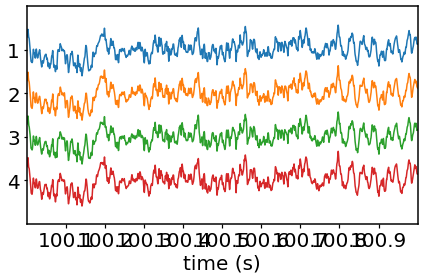

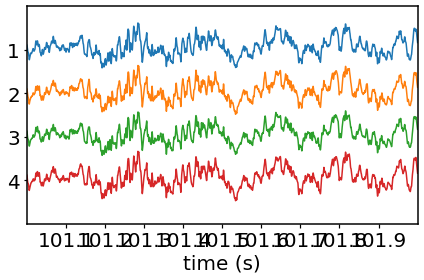

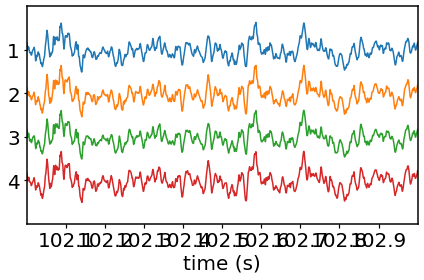

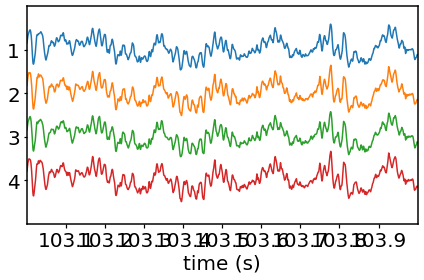

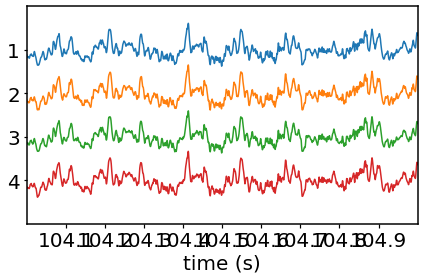

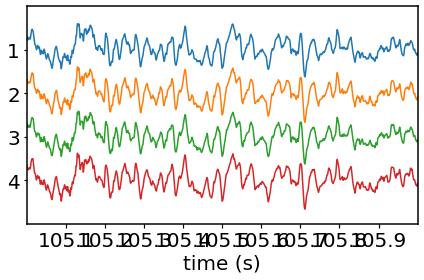

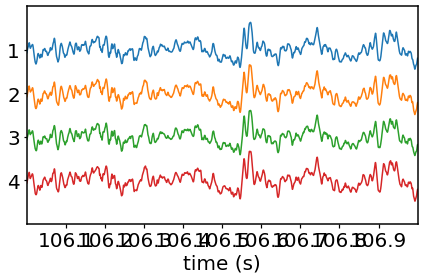

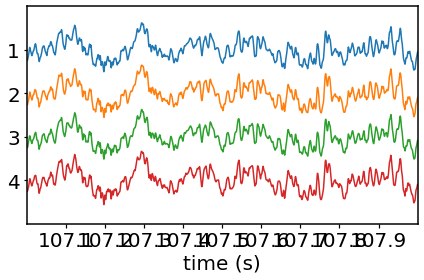

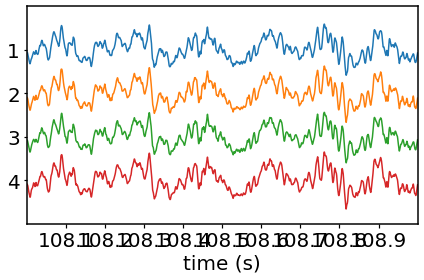

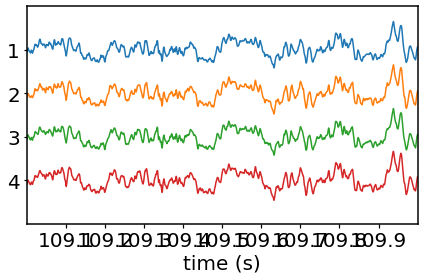

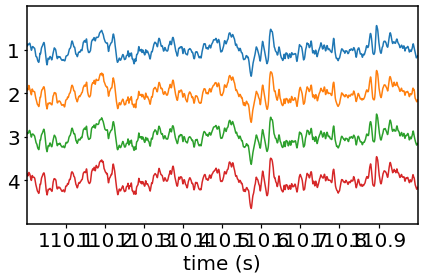

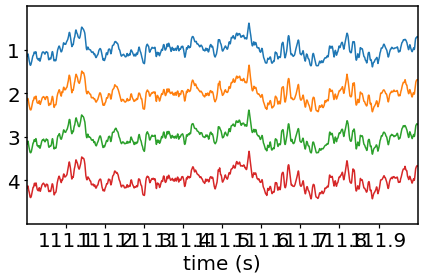

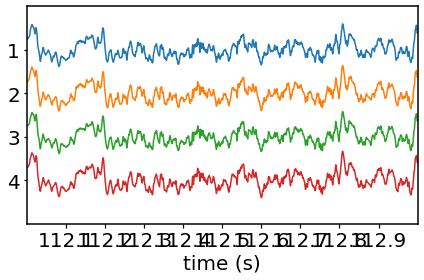

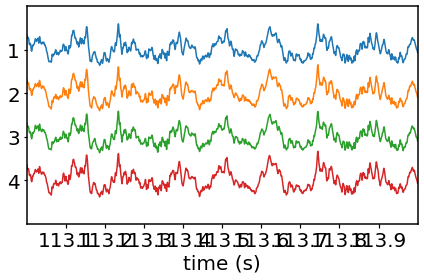

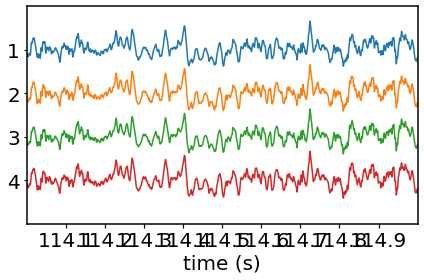

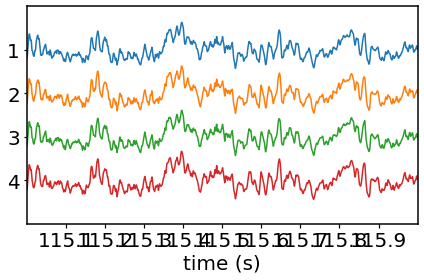

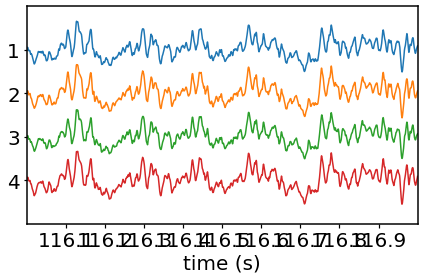

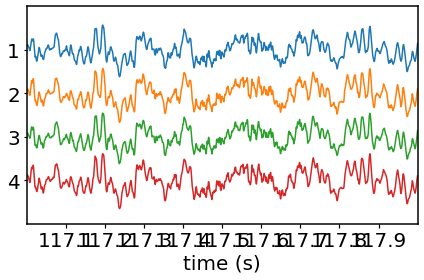

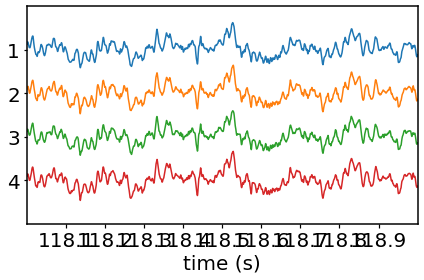

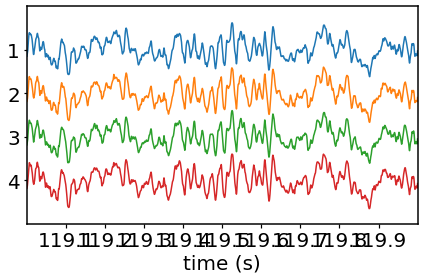

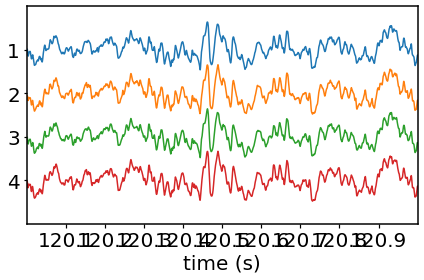

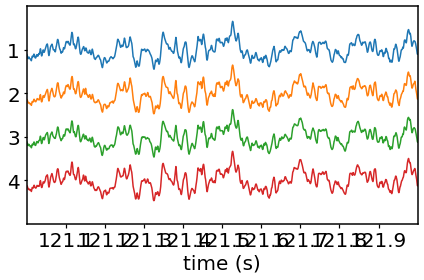

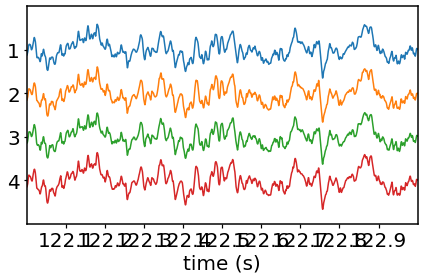

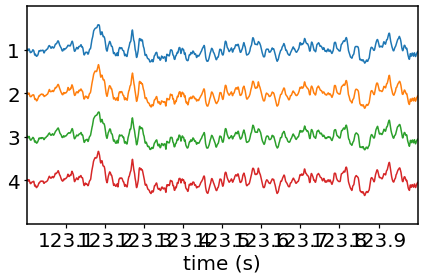

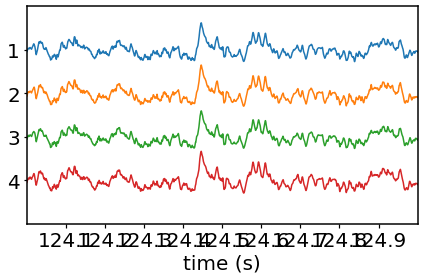

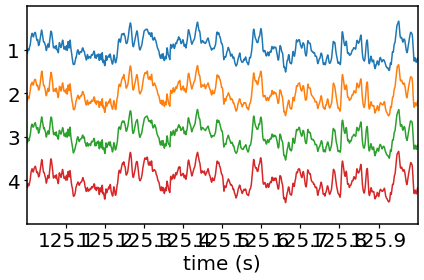

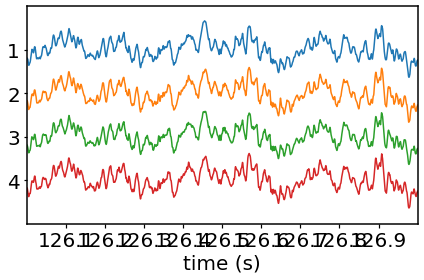

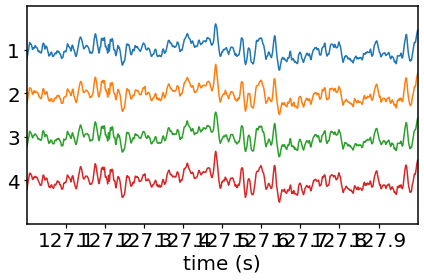

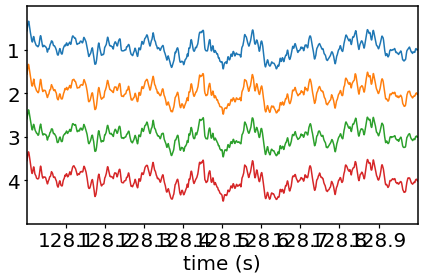

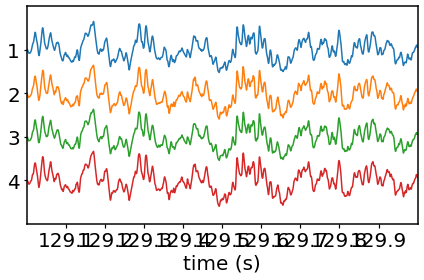

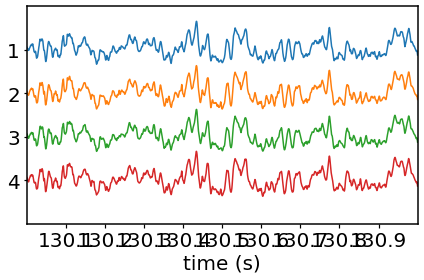

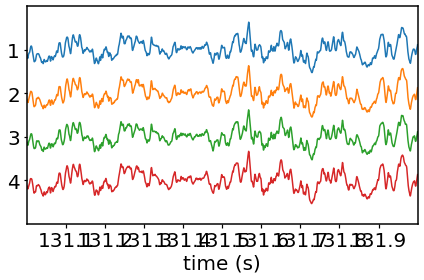

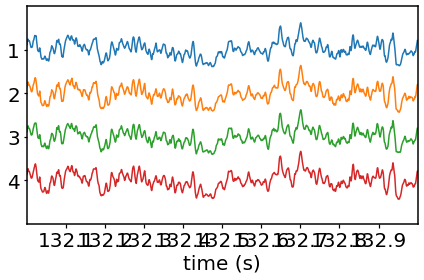

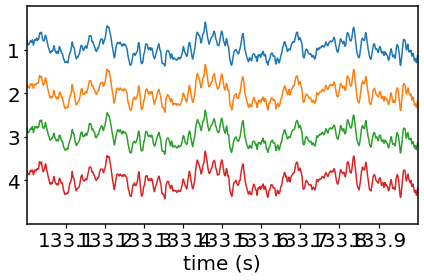

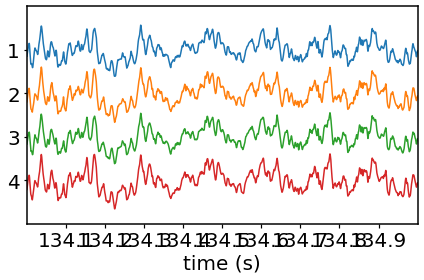

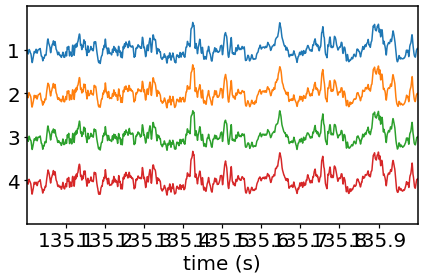

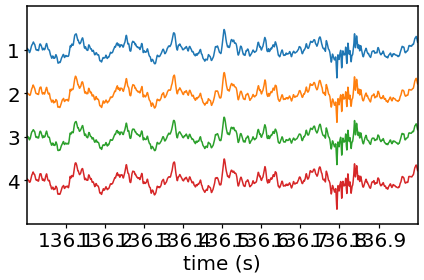

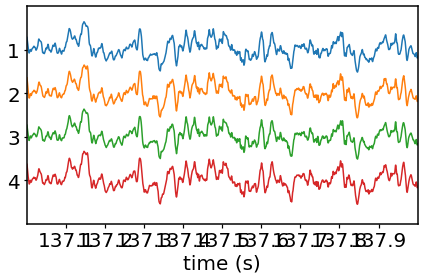

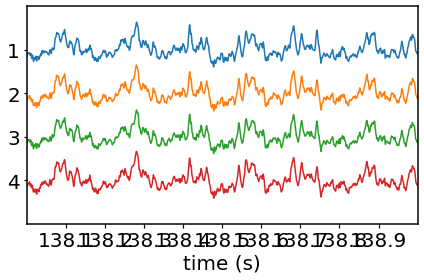

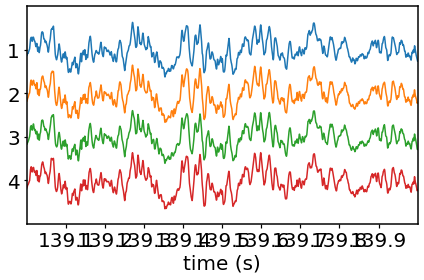

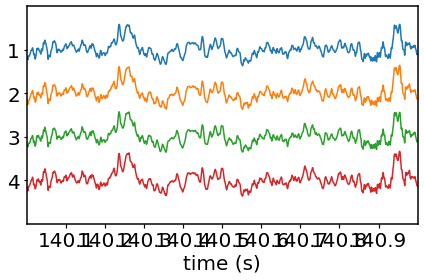

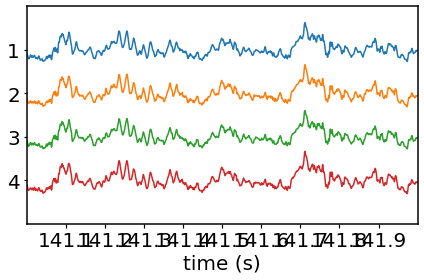

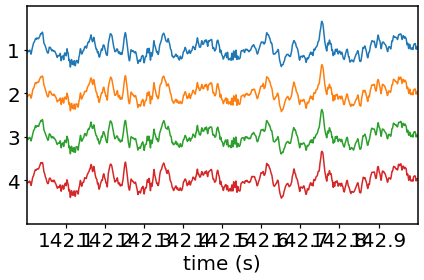

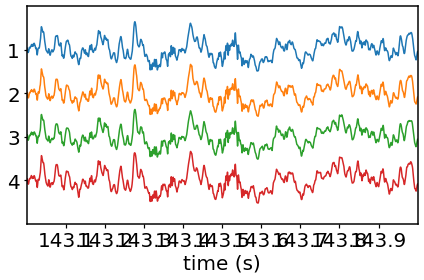

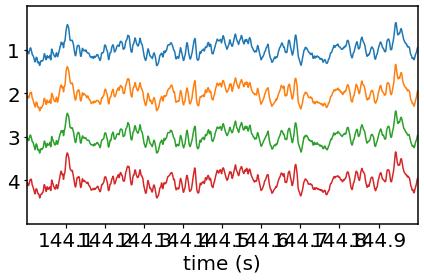

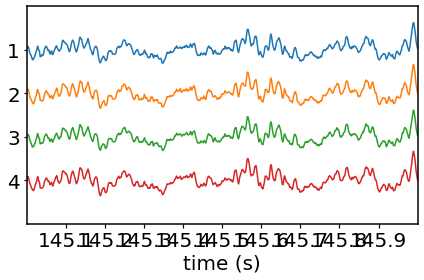

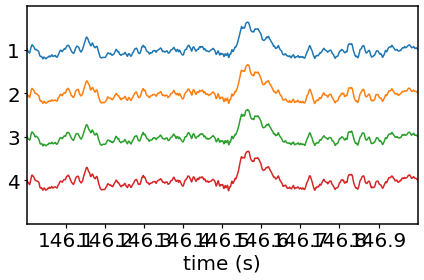

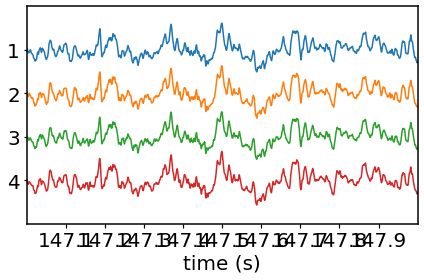

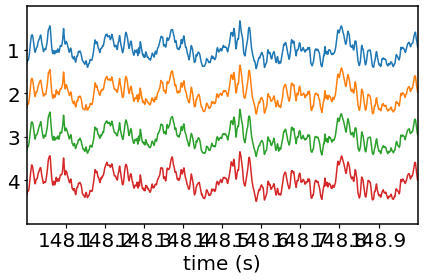

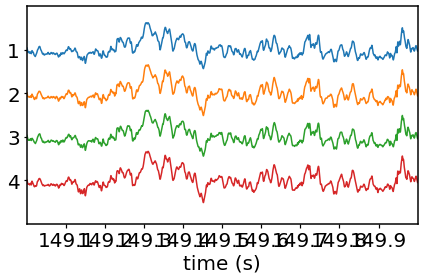

In [79]:
for i in np.arange(100,150):
    sw.plot_timeseries(recording, time_range=(i, i+1),
                       color_groups=True, channel_ids=['1','2','3','4'],
                       show_channel_ids=True, mode='line'
                      )

In [10]:
duration=(142,142.5)

In [17]:
output_direction='/Volumes/GoogleDrive-106311891740711524512/My Drive/Lab/Lab_projects/Daron/tetrode/results/SWP'

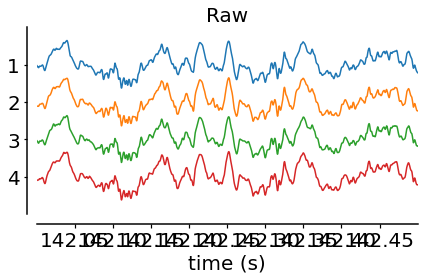

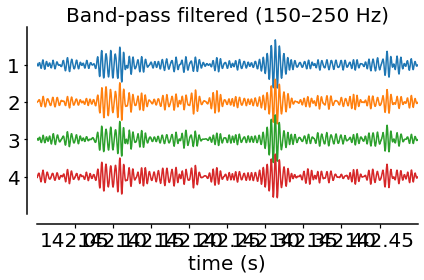

In [18]:
# f, ax = plt.subplots(2,1)
# plt.sca(ax[0])
sw.plot_timeseries(recording, time_range=duration,
                   color_groups=True, channel_ids=['1','2','3','4'],
                   show_channel_ids=True, mode='line'
                  )
ax1 = plt.gca()
ax1.set_title('Raw')
# Hide the spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Move spines outward by 10 points
ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 10))

[plt.savefig(f'{output_direction}/Example_trace_Raw{duration}.{ff}',dpi=500,
             transparent=True,bbox_inches='tight') for ff in ['svg','png']]

# plt.sca(ax[1])
sw.plot_timeseries(recording_f, time_range=duration,
               color_groups=True, channel_ids=['1','2','3','4'],
               show_channel_ids=True, mode='line'
              )
ax2 = plt.gca()
ax2.set_title('Band-pass filtered (150–250 Hz)')
# Hide the spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Move spines outward by 10 points
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 10))

[plt.savefig(f'{output_direction}/Example_trace_BP{duration}.{ff}',dpi=500,
             transparent=True,bbox_inches='tight') for ff in ['svg','png']]
plt.show()

In [1]:
# Ripple detection
# larger than 3-5*sd (filtered amplitude)

SyntaxError: invalid syntax (563551395.py, line 2)

In [2]:
# isolation distance l-ratio Good unit==>(LR<0.1,ID>20)

In [ ]:
# mClass 